In [ ]:
#Review the codes - remove the "duration" 

In [ ]:
#Collaborative filtering method - Unsupervised Learning
#Similarity Metric 1
#Euclidean Distance
import pandas as pd
import numpy as np

indiv = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Individual Dataset\CS703 Individual Dataset.csv')

# Input the name of the track I like
track = 'Soft'

# Filter the DataFrame based on the track name
filtered_indiv = indiv[indiv['track'] == 'Soft']

# Display the audio features for the specified track
print(filtered_indiv[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

# Load the individual dataset and filter for the desired track
track_row = indiv.loc[indiv['track'] == track]
track_features = track_row.iloc[:, 4:14].values[0]
track_artist = track_row.iloc[0, 0]

# Load the generalized dataset and extract the relevant audio features
genl = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Generalized Dataset\CS703 Generalized Dataset.csv')
genl_features = genl.iloc[:, 5:15].values
genl_artists = genl.iloc[:, 1].values

# Calculate the Euclidean distances between the track features and all other tracks
distances = np.sqrt(np.sum(np.square(genl_features - track_features), axis=1))

# Find the indices of 5 tracks with the smallest distance (i.e., the 5 most similar tracks)
most_similar_indices = np.argsort(distances)[:6]

# Extract the information of the most similar tracks
most_similar_features = genl.iloc[most_similar_indices, 5:15]
most_similar_track_names = genl.iloc[most_similar_indices, 2]
most_similar_artists = genl.iloc[most_similar_indices, 1]

# Get the names of the audio feature coefficients
feature_names = list(genl.columns[5:15])

# Display the most similar tracks and their features
print(f'The 5 most similar tracks to "{track}" by {track_artist} are:')
for i in range(5):
    print(f'{most_similar_track_names.iloc[i]} by {most_similar_artists.iloc[i]}:')
    for j in range(len(feature_names)):
        print(f'{feature_names[j]}: {most_similar_features.iloc[i, j]}')
    print()  # print an empty line for spacing between each track

In [9]:
#Similarity Metric 3
#Cosine Similarity

from sklearn.metrics.pairwise import cosine_similarity

# Load the individual dataset and filter for the desired track
track = 'Soft'
indiv = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Individual Dataset\CS703 Individual Dataset.csv')
track_features = indiv.loc[indiv['track'] == track].iloc[:, 4:14].values[0]
track_artist = track_row.iloc[0, 0]

# Load the generalized dataset and extract the relevant audio features and artist names
genl = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Generalized Dataset\CS703 Generalized Dataset.csv')
genl_features = genl.iloc[:, 5:15].values
genl_artists = genl.iloc[:, 1].values

# Calculate the cosine similarities between the track features and all other tracks
similarities = cosine_similarity(track_features.reshape(1, -1), genl_features)

# Find the indices of 5 tracks with the highest cosine similarity
most_similar_indices = np.argsort(similarities[0])[-6:-1]

# Extract the information of the most similar tracks
most_similar_features = genl.iloc[most_similar_indices, 5:15]
most_similar_track_names = genl.iloc[most_similar_indices, 2]
most_similar_artists = genl_artists[most_similar_indices]

# Get the names of the audio feature coefficients
feature_names = list(genl.columns[5:15])

# Display the most similar tracks and their features
print(f'The 5 most similar tracks to "{track}" by {track_artist} are:')
for i in range(5):
    print(f'{most_similar_track_names.iloc[i]} by {most_similar_artists[i]}:')
    for j in range(len(feature_names)):
        print(f'{feature_names[j]}: {most_similar_features.iloc[i, j]}')
    print()  # print an empty line for spacing between each track

The 5 most similar tracks to "Soft" by J_ust are:
Mal de Ausencia - Remasterizado by ['Francisco Canaro', 'Roberto Maida']:
danceability: 0.655
energy: 0.319
key: 11
loudness: -7.66
mode: 0
speechiness: 0.0588
acousticness: 0.993
instrumentalness: 0.000302
liveness: 0.102
valence: 0.576

Paint A Lady by ['Susan Christie']:
danceability: 0.392
energy: 0.446
key: 11
loudness: -7.481
mode: 0
speechiness: 0.0711
acousticness: 0.543
instrumentalness: 6.03e-06
liveness: 0.13
valence: 0.382

Who Hurt You? by ['Daniel Caesar']:
danceability: 0.649
energy: 0.493
key: 11
loudness: -7.645
mode: 0
speechiness: 0.11
acousticness: 0.586
instrumentalness: 0.000167
liveness: 0.0667
valence: 0.277

Romeo And Juliet by ['Indigo Girls']:
danceability: 0.424
energy: 0.327
key: 11
loudness: -7.758
mode: 0
speechiness: 0.048
acousticness: 0.788
instrumentalness: 0.0
liveness: 0.283
valence: 0.453

Alone by ['Bazzi']:
danceability: 0.516
energy: 0.414
key: 9
loudness: -6.335
mode: 0
speechiness: 0.0351
acous

In [12]:
#Collaborative filtering method

#Euclidean Distance

# Load the individual dataset
indiv = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Individual Dataset\CS703 Individual Dataset.csv')

# Load the generalized dataset
genl = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Generalized Dataset\CS703 Generalized Dataset.csv')

# Define the set of target songs
target_songs = ['Soft', 'Polaroid', 'Vacance in September', 'Soothe (feat. Junmo)', 'bath']

# Filter the individual dataset based on the target songs
target_indiv = indiv[indiv['track'].isin(target_songs)]

# Compute the average feature values for the target songs
target_features = target_indiv.iloc[:, 4:14].mean()

# Extract the relevant audio features from the generalized dataset
genl_features = genl.iloc[:, 5:15].values

# Calculate the Euclidean distances between the target features and all other tracks
distances = np.sqrt(np.sum(np.square(genl_features - target_features.values), axis=1))

# Find the indices of 5 tracks with the smallest distance (i.e., the 5 most similar tracks)
most_similar_indices = np.argsort(distances)[:6]

# Extract the information of the most similar tracks
most_similar_features = genl.iloc[most_similar_indices, 5:15]
most_similar_track_names = genl.iloc[most_similar_indices, 2]
most_similar_artists = genl.iloc[most_similar_indices, 1]

# Get the names of the audio feature coefficients
feature_names = list(genl.columns[5:15])

# Display the most similar tracks and their features
print(f'The 5 most similar tracks to the target set {target_songs} are:')
for i in range(5):
    print(f'{most_similar_track_names.iloc[i]} by {most_similar_artists.iloc[i]}:')
    for j in range(len(feature_names)):
        print(f'{feature_names[j]}: {most_similar_features.iloc[i, j]}')
    print()

The 5 most similar tracks to the target set ['Soft', 'Polaroid', 'Vacance in September', 'Soothe (feat. Junmo)', 'bath'] are:
It Took Me By Surprise by ['Maria Mena']:
danceability: 0.614
energy: 0.532
key: 7
loudness: -7.095
mode: 0
speechiness: 0.0505
acousticness: 0.395
instrumentalness: 0.0
liveness: 0.0718
valence: 0.299

The Lonesome Road by ['Sammy Davis Jr.']:
danceability: 0.574
energy: 0.542
key: 7
loudness: -6.89
mode: 0
speechiness: 0.048
acousticness: 0.701
instrumentalness: 0.0
liveness: 0.0798
valence: 0.329

Diana by ['Comus']:
danceability: 0.418
energy: 0.592
key: 7
loudness: -7.045
mode: 0
speechiness: 0.043
acousticness: 0.57
instrumentalness: 2.3e-05
liveness: 0.223
valence: 0.457

Beaver Junction by ['Count Basie']:
danceability: 0.519
energy: 0.532
key: 7
loudness: -6.899
mode: 0
speechiness: 0.0384
acousticness: 0.67
instrumentalness: 0.00703
liveness: 0.0998
valence: 0.539

Pretender - Acoustic by ['AJR']:
danceability: 0.811
energy: 0.365
key: 7
loudness: -6.9

In [16]:
#Cosine Similarity 

# Load the individual dataset
indiv = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Individual Dataset\CS703 Individual Dataset.csv')

# Load the generalized dataset
genl = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Generalized Dataset\CS703 Generalized Dataset.csv')

# Define the set of target songs
target_songs = ['Soft', 'Polaroid', 'Vacance in September', 'Soothe (feat. Junmo)', 'bath']

# Filter the individual dataset based on the target songs
target_indiv = indiv[indiv['track'].isin(target_songs)]

# Compute the average feature values for the target songs
target_features = target_indiv.iloc[:, 4:14].mean()

# Extract the relevant audio features from the generalized dataset
genl_features = genl.iloc[:, 5:15].values

# Calculate the Cosine Similarities between the target features and all other tracks
similarities = np.dot(genl_features, target_features.values) / (np.sqrt(np.sum(np.square(genl_features), axis=1)) * np.sqrt(np.sum(np.square(target_features.values))))

# Find the indices of 5 tracks with the highest similarity (i.e., the 5 most similar tracks)
most_similar_indices = np.argsort(similarities)[::-1][:6]

# Extract the information of the most similar tracks
most_similar_features = genl.iloc[most_similar_indices, 5:15]
most_similar_track_names = genl.iloc[most_similar_indices, 2]
most_similar_artists = genl.iloc[most_similar_indices, 1]

# Get the names of the audio feature coefficients
feature_names = list(genl.columns[5:15])

# Display the most similar tracks and their features
print(f'The 5 most similar tracks to the target set {target_songs} are:')
for i in range(5):
    print(f'{most_similar_track_names.iloc[i]} by {most_similar_artists.iloc[i]}:')
    for j in range(len(feature_names)):
        print(f'{feature_names[j]}: {most_similar_features.iloc[i, j]}')
    print()

The 5 most similar tracks to the target set ['Soft', 'Polaroid', 'Vacance in September', 'Soothe (feat. Junmo)', 'bath'] are:
Trooper's Lament by ['Sgt. Barry Sadler']:
danceability: 0.608
energy: 0.477
key: 11
loudness: -10.573
mode: 1
speechiness: 0.036
acousticness: 0.82
instrumentalness: 6.13e-05
liveness: 0.401
valence: 0.565

Stfu by ['Pink Guy']:
danceability: 0.827
energy: 0.524
key: 10
loudness: -9.819
mode: 1
speechiness: 0.0536
acousticness: 0.552
instrumentalness: 0.000112
liveness: 0.198
valence: 0.356

Remember the Alamo by ['Johnny Cash']:
danceability: 0.619
energy: 0.553
key: 10
loudness: -9.604
mode: 1
speechiness: 0.0568
acousticness: 0.828
instrumentalness: 0.00235
liveness: 0.132
valence: 0.447

Media Vuelta by ['Eydie Gormé', 'Los Panchos']:
danceability: 0.664
energy: 0.48
key: 10
loudness: -9.536
mode: 1
speechiness: 0.0437
acousticness: 0.619
instrumentalness: 0.0
liveness: 0.365
valence: 0.584

It's Alright To Cry by ['Rosy Grier']:
danceability: 0.734
energy:

In [8]:
#Revise codes - gt100

#Collaborative filtering method - Unsupervised Learning
#Similarity Metric 1
#Euclidean Distance
import pandas as pd
import numpy as np

indiv = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Individual Dataset\CS703 Individual Dataset.csv')

# Input the name of the track I like
track = 'Soft'

# Filter the DataFrame based on the track name
filtered_indiv = indiv[indiv['track'] == 'Soft']

# Load the individual dataset and filter for the desired track
track_row = indiv.loc[indiv['track'] == track]
track_features = track_row.iloc[:, 4:14].values[0]
track_artist = track_row.iloc[0, 0]

# Load the global weekly top 100 songs dataset and extract the relevant audio features
gt100=pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Global Weekly Top 100 Songs\CS703 Global Weekly Top 100 Songs.csv')
gt100_features = gt100.iloc[:, 9:19].values
gt100_artists = gt100.iloc[:, 2].values

# Calculate the Euclidean distances between the track features and all other tracks
distances = np.sqrt(np.sum(np.square(gt100_features - track_features), axis=1))

# Find the indices of 5 tracks with the smallest distance (i.e., the 5 most similar tracks)
most_similar_indices = np.argsort(distances)[:6]

# Extract the information of the most similar tracks
most_similar_features = gt100.iloc[most_similar_indices, 9:19]
most_similar_track_names = gt100.iloc[most_similar_indices, 3]
most_similar_artists = gt100.iloc[most_similar_indices, 2]

# Get the names of the audio feature coefficients
feature_names = list(gt100.columns[9:19])

# Display the most similar tracks and their features
print(f'The 5 most similar tracks to "{track}" by {track_artist} are:')
for i in range(5):
    print(f'{most_similar_track_names.iloc[i]} by {most_similar_artists.iloc[i]}:')
    for j in range(len(feature_names)):
        print(f'{feature_names[j]}: {most_similar_features.iloc[i, j]}')
    print()  # print an empty line for spacing between each track

The 5 most similar tracks to "Soft" by J_ust are:
Sure Thing by Miguel:
danceability: 0.684
energy: 0.607
key: 11
loudness: -8.127
mode: 0
speechiness: 0.1
acousticness: 0.0267
instrumentalness: 0.000307
liveness: 0.191
valence: 0.498

Heat Waves by Glass Animals:
danceability: 0.761
energy: 0.525
key: 11
loudness: -6.9
mode: 1
speechiness: 0.0944
acousticness: 0.44
instrumentalness: 6.7e-06
liveness: 0.0921
valence: 0.531

Just Wanna Rock by Lil Uzi Vert:
danceability: 0.486
energy: 0.545
key: 11
loudness: -7.924
mode: 1
speechiness: 0.0336
acousticness: 0.0652
instrumentalness: 0.00474
liveness: 0.0642
valence: 0.0385

Yellow by Coldplay:
danceability: 0.429
energy: 0.661
key: 11
loudness: -7.227
mode: 1
speechiness: 0.0281
acousticness: 0.00239
instrumentalness: 0.000121
liveness: 0.234
valence: 0.285

No Role Modelz by J. Cole:
danceability: 0.69
energy: 0.521
key: 10
loudness: -8.492
mode: 0
speechiness: 0.339
acousticness: 0.324
instrumentalness: 0.0
liveness: 0.0534
valence: 0.4

In [10]:
#Revise codes - gt100

#Similarity Metric 3
#Cosine Similarity

from sklearn.metrics.pairwise import cosine_similarity

# Load the individual dataset and filter for the desired track
track = 'Soft'
indiv = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Individual Dataset\CS703 Individual Dataset.csv')
track_features = indiv.loc[indiv['track'] == track].iloc[:, 4:14].values[0]
track_artist = track_row.iloc[0, 0]

# Load the global weekly top 100 songs dataset and extract the relevant audio features and artist names
gt100=pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Global Weekly Top 100 Songs\CS703 Global Weekly Top 100 Songs.csv')
gt100_features = gt100.iloc[:, 9:19].values
gt100_artists = gt100.iloc[:, 2].values

# Calculate the cosine similarities between the track features and all other tracks
similarities = cosine_similarity(track_features.reshape(1, -1), gt100_features)

# Find the indices of 5 tracks with the highest cosine similarity
most_similar_indices = np.argsort(similarities[0])[-6:-1]

# Extract the information of the most similar tracks
most_similar_features = gt100.iloc[most_similar_indices, 9:19]
most_similar_track_names = gt100.iloc[most_similar_indices, 3]
most_similar_artists = gt100_artists[most_similar_indices]

# Get the names of the audio feature coefficients
feature_names = list(gt100.columns[9:19])

# Display the most similar tracks and their features
print(f'The 5 most similar tracks to "{track}" by {track_artist} are:')
for i in range(5):
    print(f'{most_similar_track_names.iloc[i]} by {most_similar_artists[i]}:')
    for j in range(len(feature_names)):
        print(f'{feature_names[j]}: {most_similar_features.iloc[i, j]}')
    print()  # print an empty line for spacing between each track

The 5 most similar tracks to "Soft" by J_ust are:
Lift Me Up - From Black Panther: Wakanda Forever - Music From and Inspired By by Rihanna:
danceability: 0.247
energy: 0.299
key: 9
loudness: -6.083
mode: 1
speechiness: 0.0315
acousticness: 0.899
instrumentalness: 0.0
liveness: 0.131
valence: 0.172

Just Wanna Rock by Lil Uzi Vert:
danceability: 0.486
energy: 0.545
key: 11
loudness: -7.924
mode: 1
speechiness: 0.0336
acousticness: 0.0652
instrumentalness: 0.00474
liveness: 0.0642
valence: 0.0385

Heat Waves by Glass Animals:
danceability: 0.761
energy: 0.525
key: 11
loudness: -6.9
mode: 1
speechiness: 0.0944
acousticness: 0.44
instrumentalness: 6.7e-06
liveness: 0.0921
valence: 0.531

Under The Influence by Chris Brown:
danceability: 0.733
energy: 0.69
key: 9
loudness: -5.529
mode: 0
speechiness: 0.0427
acousticness: 0.0635
instrumentalness: 1.18e-06
liveness: 0.105
valence: 0.31

Bloody Mary by Lady Gaga:
danceability: 0.591
energy: 0.637
key: 9
loudness: -6.365
mode: 0
speechiness: 0.

In [25]:
#Revise codes - gt100

#Collaborative filtering method

#Euclidean Distance

# Load the individual dataset
indiv = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Individual Dataset\CS703 Individual Dataset.csv')

# Load the global weekly top 100 songs dataset
gt100=pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Global Weekly Top 100 Songs\CS703 Global Weekly Top 100 Songs.csv')

# Define the set of target songs
target_songs = ['Soft', 'Polaroid', 'Vacance in September', 'Soothe (feat. Junmo)', 'bath']

# Filter the individual dataset based on the target songs
target_indiv = indiv[indiv['track'].isin(target_songs)]

# Compute the average feature values for the target songs
target_features = target_indiv.iloc[:, 4:14].mean()

# Extract the relevant audio features from the global weekly top 100 songs dataset
gt100_features = gt100.iloc[:, 9:19].values

# Calculate the Euclidean distances between the target features and all other tracks
distances = np.sqrt(np.sum(np.square(gt100_features - target_features.values), axis=1))

# Find the indices of 5 tracks with the smallest distance (i.e., the 5 most similar tracks)
most_similar_indices = np.argsort(distances)[:6]

# Extract the information of the most similar tracks
most_similar_features = gt100.iloc[most_similar_indices, 5:15]
most_similar_track_names = gt100.iloc[most_similar_indices, 3]
most_similar_artists = gt100.iloc[most_similar_indices, 2]

# Get the names of the audio feature coefficients
feature_names = list(gt100.columns[9:19])

# Display the most similar tracks and their features
print(f'The 5 most similar tracks to the target set {target_songs} are:')
for i in range(5):
    print(f'{most_similar_track_names.iloc[i]} by {most_similar_artists.iloc[i]}:')
    for j in range(len(feature_names)):
        print(f'{feature_names[j]}: {most_similar_features.iloc[i, j]}')
    print()

The 5 most similar tracks to the target set ['Soft', 'Polaroid', 'Vacance in September', 'Soothe (feat. Junmo)', 'bath'] are:
Starboy by The Weeknd, Daft Punk:
danceability: 1
energy: 50
key: 119
loudness: 13540082
mode: 0.679
speechiness: 0.587
acousticness: 7
instrumentalness: -7.015
liveness: 1
valence: 0.276

DESPECHÁ by ROSALÍA:
danceability: 5
energy: 29
key: 24
loudness: 14534374
mode: 0.914
speechiness: 0.622
acousticness: 7
instrumentalness: -6.538
liveness: 1
valence: 0.0892

SPIT IN MY FACE! by ThxSoMch:
danceability: 72
energy: 93
key: 9
loudness: 10009994
mode: 0.73
speechiness: 0.785
acousticness: 8
instrumentalness: -6.512
liveness: 1
valence: 0.0554

Miss You by Oliver Tree, Robin Schulz:
danceability: 11
energy: 24
key: 14
loudness: 17020232
mode: 0.587
speechiness: 0.742
acousticness: 6
instrumentalness: -6.64
liveness: 0
valence: 0.0529

Nobody Gets Me by SZA:
danceability: 12
energy: 43
key: 5
loudness: 13664312
mode: 0.358
speechiness: 0.284
acousticness: 7
instrum

In [26]:
#Revise codes - gt100

#Cosine Similarity 

# Load the individual dataset
indiv = pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Individual Dataset\CS703 Individual Dataset.csv')

# Load the global weekly top 100 songs dataset
gt100=pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Global Weekly Top 100 Songs\CS703 Global Weekly Top 100 Songs.csv')

# Define the set of target songs
target_songs = ['Soft', 'Polaroid', 'Vacance in September', 'Soothe (feat. Junmo)', 'bath']

# Filter the individual dataset based on the target songs
target_indiv = indiv[indiv['track'].isin(target_songs)]

# Compute the average feature values for the target songs
target_features = target_indiv.iloc[:, 4:14].mean()

# Extract the relevant audio features from the generalized dataset
gt100_features = gt100.iloc[:, 9:19].values

# Calculate the Cosine Similarities between the target features and all other tracks
similarities = np.dot(gt100_features, target_features.values) / (np.sqrt(np.sum(np.square(gt100_features), axis=1)) * np.sqrt(np.sum(np.square(target_features.values))))

# Find the indices of 5 tracks with the highest similarity (i.e., the 5 most similar tracks)
most_similar_indices = np.argsort(similarities)[::-1][:6]

# Extract the information of the most similar tracks
most_similar_features = gt100.iloc[most_similar_indices, 9:19]
most_similar_track_names = gt100.iloc[most_similar_indices, 3]
most_similar_artists = gt100.iloc[most_similar_indices, 2]

# Get the names of the audio feature coefficients
feature_names = list(genl.columns[5:15])

# Display the most similar tracks and their features
print(f'The 5 most similar tracks to the target set {target_songs} are:')
for i in range(5):
    print(f'{most_similar_track_names.iloc[i]} by {most_similar_artists.iloc[i]}:')
    for j in range(len(feature_names)):
        print(f'{feature_names[j]}: {most_similar_features.iloc[i, j]}')
    print()

The 5 most similar tracks to the target set ['Soft', 'Polaroid', 'Vacance in September', 'Soothe (feat. Junmo)', 'bath'] are:
Lavender Haze by Taylor Swift:
danceability: 0.733
energy: 0.436
key: 10
loudness: -10.489
mode: 1
speechiness: 0.08
acousticness: 0.258
instrumentalness: 0.000573
liveness: 0.157
valence: 0.0976

Shinunoga E-Wa by Fujii Kaze:
danceability: 0.6
energy: 0.76
key: 6
loudness: -6.124
mode: 0
speechiness: 0.0452
acousticness: 0.166
instrumentalness: 4.09e-05
liveness: 0.189
valence: 0.519

Starboy by The Weeknd, Daft Punk:
danceability: 0.679
energy: 0.587
key: 7
loudness: -7.015
mode: 1
speechiness: 0.276
acousticness: 0.141
instrumentalness: 6.35e-06
liveness: 0.137
valence: 0.486

Ditto by NewJeans:
danceability: 0.814
energy: 0.641
key: 6
loudness: -5.957
mode: 0
speechiness: 0.111
acousticness: 0.027
instrumentalness: 0.0
liveness: 0.0993
valence: 0.183

No Role Modelz by J. Cole:
danceability: 0.69
energy: 0.521
key: 10
loudness: -8.492
mode: 0
speechiness: 0.

In [1]:
#Generalized Dataset
#Data Quality Recheck
#Visualizations between genl and gt100

#Impoart Datasets
import pandas as pd
gt100=pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Global Weekly Top 100 Songs\CS703 Global Weekly Top 100 Songs.csv')
genl=pd.read_csv(r'C:\Users\madlin\Desktop\les notes de madeline\mademoiselle madeline stuff boooom\DS\Applied DS Project\Data\Generalized Dataset\CS703 Generalized Dataset.csv')

#Scale some of the attributes
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Scale the key, loudness, tempo attributes using min-max scaling in global weekly top 100 songs dataset
key_scaler = MinMaxScaler()
scaled_key = key_scaler.fit_transform(gt100[['key']])

loudness_scaler = MinMaxScaler()
scaled_loudness = loudness_scaler.fit_transform(gt100[['loudness']])

tempo_scaler = MinMaxScaler()
scaled_tempo = tempo_scaler.fit_transform(gt100[['tempo']])

gt100['scaled_key']=scaled_key
gt100['scaled_loudness']=scaled_loudness
gt100['scaled_tempo']=scaled_tempo

gt100.head()

,rank,URI,artist,track,source,peak_rank,previous_rank,weeks_on_chart,msPlayed,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,pred_msPlayed,scaled_key,scaled_loudness,scaled_tempo
0,1,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,SZA,Kill Bill,Top Dawg Entertainment/RCA Records,1,1,5,47288509,0.644,...,0.05210,0.144000,0.1610,0.418,88.980,153947,NaN,0.727273,0.626374,0.158977
1,2,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,"Metro Boomin, The Weeknd, 21 Savage",Creepin' (with The Weeknd & 21 Savage),Republic Records,2,5,6,30753658,0.715,...,0.41700,0.000000,0.0822,0.172,97.950,221520,NaN,0.090909,0.607954,0.225452
2,3,spotify:track:3nqQXoyQOWXiESFLlDF1hG,"Sam Smith, Kim Petras",Unholy (feat. Kim Petras),EMI,1,2,16,30733283,0.714,...,0.01300,0.000005,0.2660,0.238,131.121,156943,NaN,0.181818,0.510139,0.471276
3,4,spotify:track:4Dvkj6JhhA12EX05fT7y2e,Harry Styles,As It Was,Columbia,1,3,41,28522200,0.520,...,0.34200,0.001010,0.3110,0.662,173.930,167303,NaN,0.545455,0.655576,0.788525
4,5,spotify:track:4uUG5RXrOk84mYEfFvj3cK,"David Guetta, Bebe Rexha",I'm Good (Blue),Parlophone UK,2,4,20,27260313,0.561,...,0.00383,0.000007,0.3710,0.304,128.040,175238,NaN,0.636364,0.774454,0.448443


In [2]:
# Scale the key, loudness, tempo attributes using min-max scaling in generalized dataset
key_scaler = MinMaxScaler()
scaled_key = key_scaler.fit_transform(genl[['key']])

loudness_scaler = MinMaxScaler()
scaled_loudness = loudness_scaler.fit_transform(genl[['loudness']])

tempo_scaler = MinMaxScaler()
scaled_tempo = tempo_scaler.fit_transform(genl[['tempo']])

genl['scaled_key']=scaled_key
genl['scaled_loudness']=scaled_loudness
genl['scaled_tempo']=scaled_tempo

genl.head()

,year,artist,track,URI,release_date,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,scaled_key,scaled_loudness,scaled_tempo
0,1921,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4BJqT0PrAfrxzMOxytFOIz,1921,0.279,0.211,10,-20.096,1,...,0.982,0.878000,0.665,0.0594,80.954,831667,4,0.909091,0.624916,0.332450
1,1921,['Dennis Day'],Clancy Lowered the Boom,7xPhfUan2yNtyFG0cUWkt8,1921,0.819,0.341,7,-12.441,1,...,0.732,0.000000,0.160,0.9630,60.936,180533,5,0.636364,0.744797,0.250243
2,1921,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,1o6I8BglA6ylDMrIELygv1,1921,0.328,0.166,3,-14.850,1,...,0.961,0.913000,0.101,0.0394,110.339,500062,5,0.272727,0.707071,0.453125
3,1921,['Frank Parker'],Danny Boy,3ftBPsC5vPBKxYSee08FDH,1921,0.275,0.309,5,-9.316,1,...,0.967,0.000028,0.381,0.1650,100.109,210000,3,0.454545,0.793736,0.411113
4,1921,['Phil Regan'],When Irish Eyes Are Smiling,4d6HGyGT8e121BsdKmw9v6,1921,0.418,0.193,3,-10.096,1,...,0.957,0.000002,0.229,0.2530,101.665,166693,2,0.272727,0.781521,0.417503


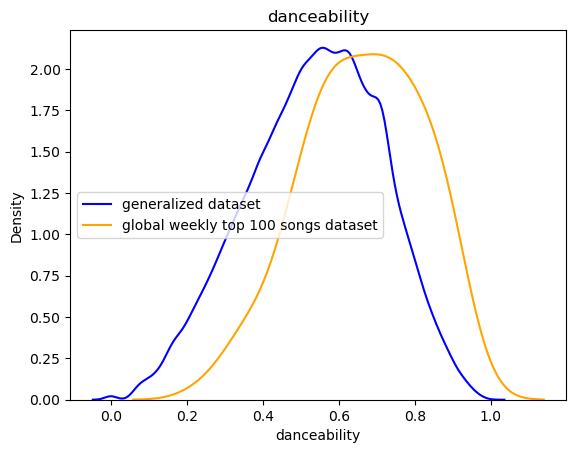

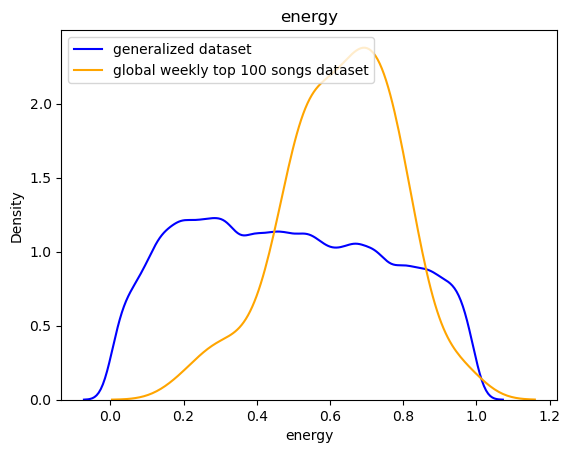

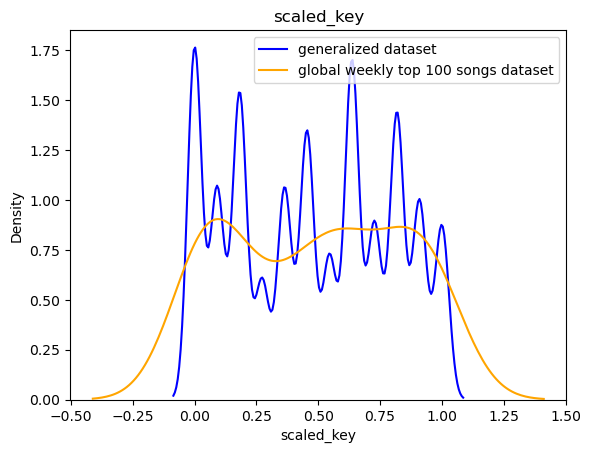

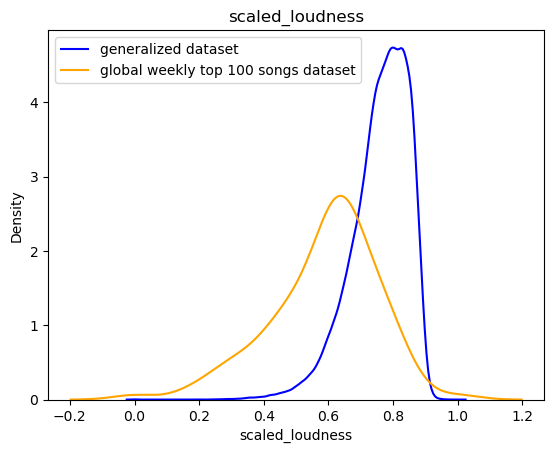

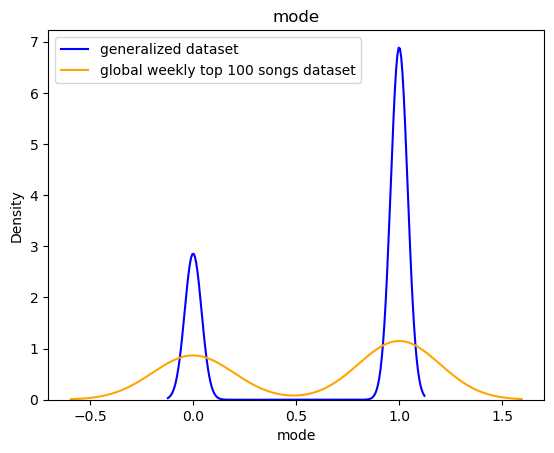

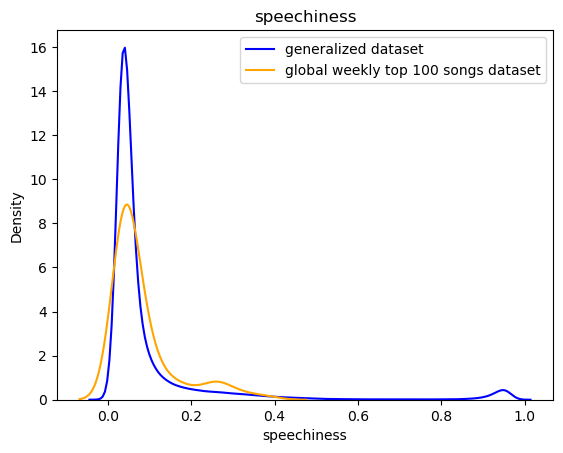

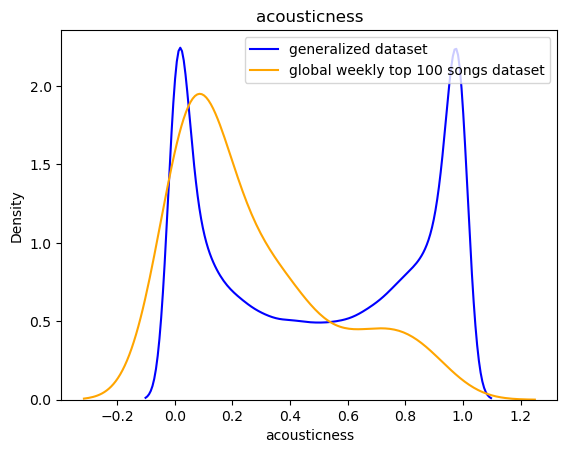

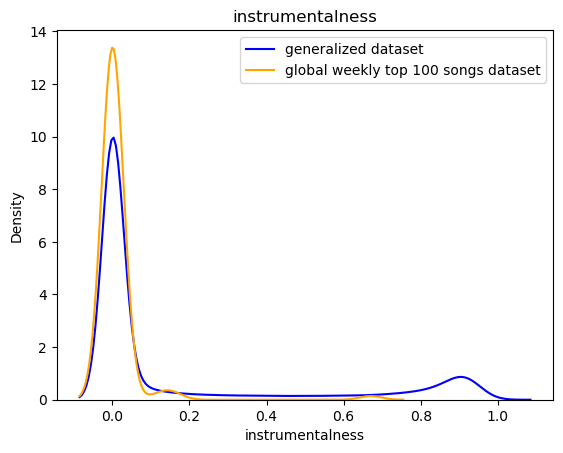

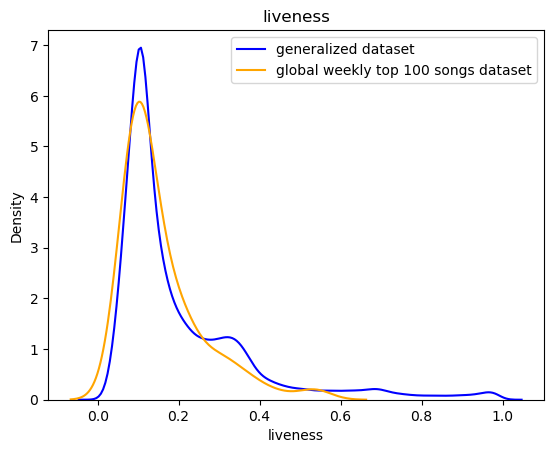

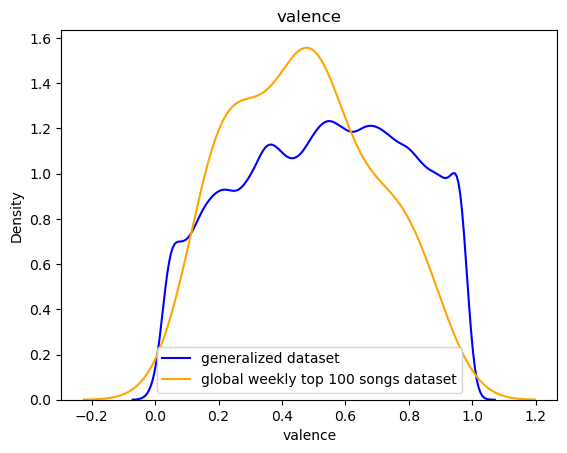

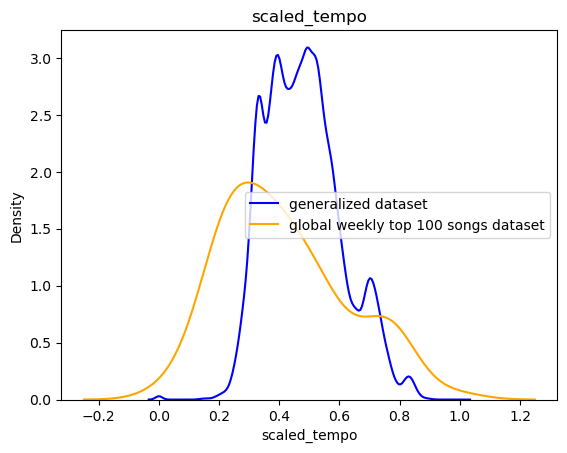

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the list of audio features
audio_features = ['danceability', 'energy', 'scaled_key', 'scaled_loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'scaled_tempo']

# Plot the KDE line for each audio feature for dataset1 and dataset2
for feature in audio_features:
    plt.figure()
    sns.kdeplot(genl[feature], color='blue', label='generalized dataset', fill=False, common_norm=False)
    sns.kdeplot(gt100[feature], color='orange', label='global weekly top 100 songs dataset', fill=False, common_norm=False)
    plt.title(feature)
    plt.legend()
    plt.show()

In [1]:
pip install jupyterlab

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install notebook

Note: you may need to restart the kernel to use updated packages.


In [7]:
jupyter notebook

SyntaxError: invalid syntax (3305369356.py, line 1)